<a href="https://colab.research.google.com/github/EmekaEnshinyan/ML-Gamma-Telescope-Dataset/blob/main/learnml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
dFrame = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/magic04.data", names=cols)
dFrame.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
dFrame["class"] = (dFrame["class"] == "g").astype(int)

In [4]:
dFrame.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


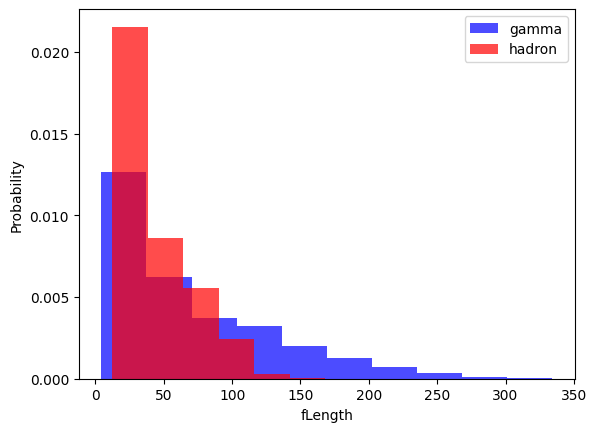

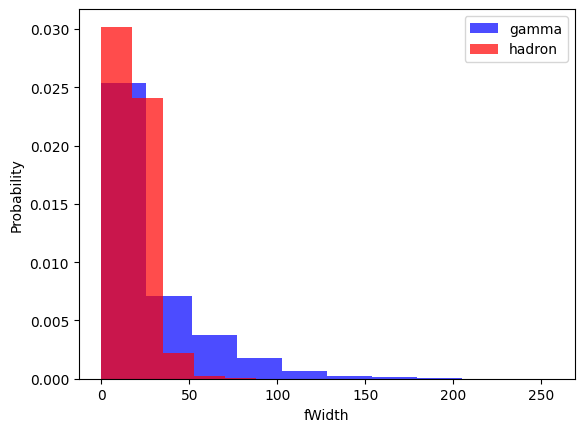

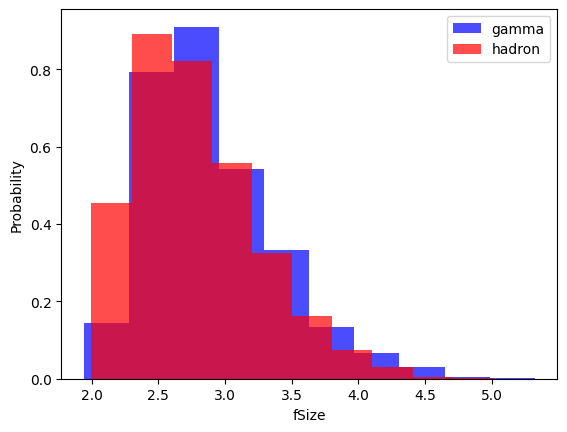

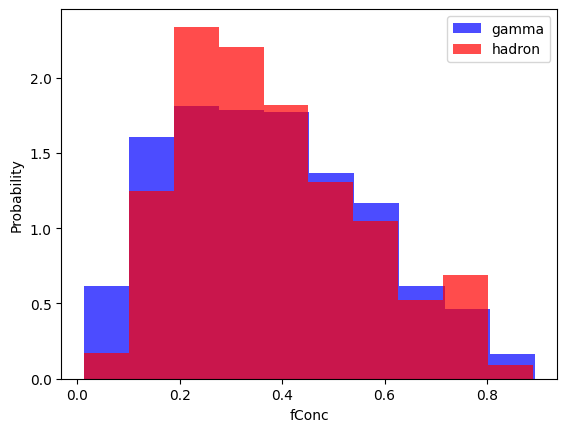

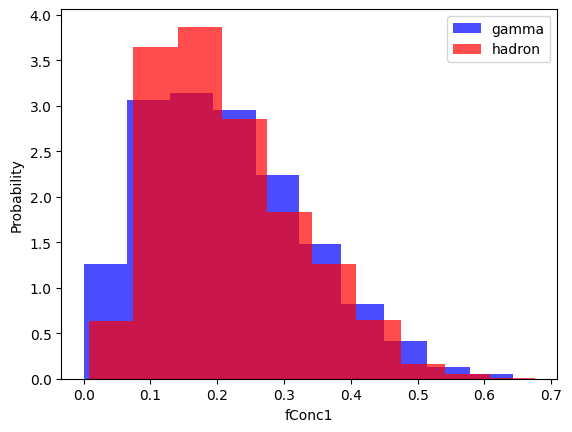

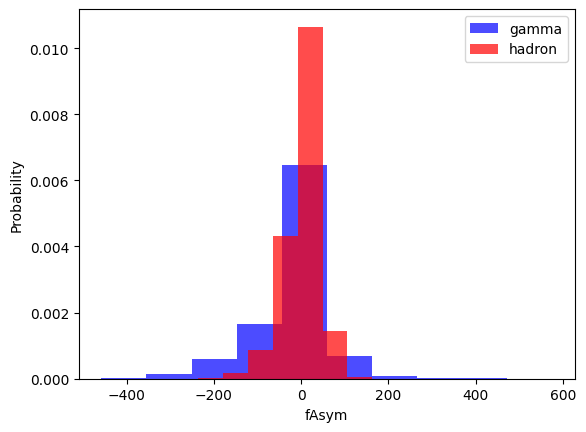

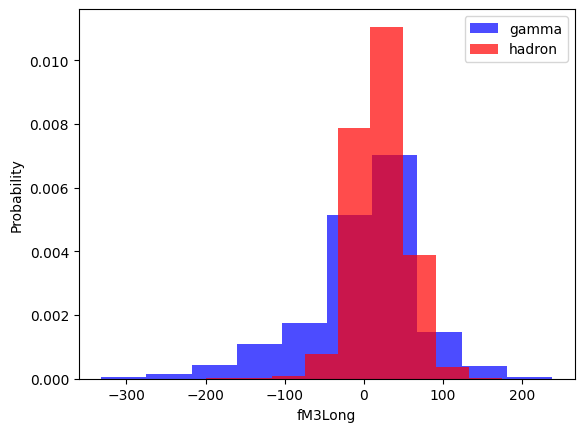

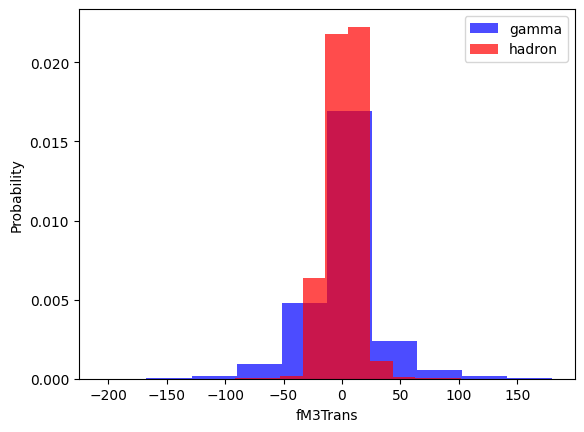

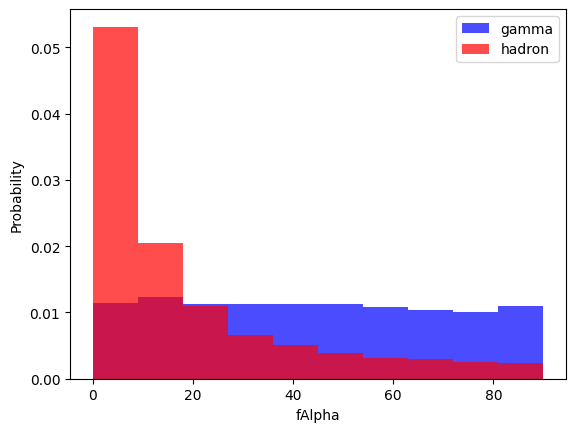

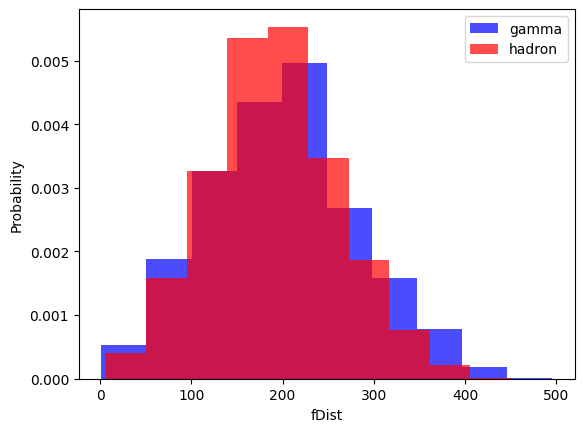

In [5]:
for label in cols[:-1]:
  #plot as historgram
    plt.hist(dFrame[dFrame["class"] == 0][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(dFrame[dFrame["class"] == 1][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

#Train, Validation, & Test Datasets

In [7]:
#splits dFrame, shuffles data [(0), (1)] is where data is being split. first split at 60% (training data), second at 80%  (60% - 80% is validation), lastly 80% - 100% (is test data)
train, valid, test = np.split(dFrame.sample(frac=1), [int(0.6*len(dFrame)), int(0.8*len(dFrame))])

In [8]:
def scale_dataset(dFrame, oversample=False):
  #x is 2-dimensional obj
  x = dFrame[dFrame.columns[:-1]].values
  #y is simply vector of values
  y = dFrame[dFrame.columns[-1]].values

  scalar = StandardScaler()
  x = scalar.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    #take more of the less class, keep smapling so the datasetsmatch in quantity
    x, y = ros.fit_resample(x, y)

  #make y 2-dimensional by passing in dimension of y (-1,1), also means (len(y), 1) 
  data = np.hstack((x, np.reshape(y, (-1,1))))
  #this means that dFrame is same type as (data, x, y). How? I dunno
  return data, x, y

In [9]:
#trainng data set: the num of gamma vs hardron is much larger, which could be a problem. So want to get the numbers closer by increasing hadron count. This is called oversampling
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #hadron

7324
4088


In [10]:
train, x_train, y_train = scale_dataset(train, oversample=True)
#no need to concern with oversample with validity
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=True)

In [11]:
len(y_train), sum((y_train == 1)), sum((y_train == 0))

(14648, 7324, 7324)